In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

hours = [1.0, 5.0, 8.0] # 공부 시간
scores = [15.0, 55.0, 60.0]


# 모델은 tensor 2개 (하나는 곱하고 하나는 더 하고) (input과 tensor 관계는 내가 정함)
# y.backward() 한 뒤 -> 하나하나 with torch. no grad() : a-=lr*a.grad

# loss
# input 3개 같이 -> loss도 3개 평균
# y = (scores - (hours*a +b))**2 -> 어?! 이렇게 되면 y는 grad 가지나? grad존재 자체가 없음
# loss = y.sum() -> loss.backward()

a = torch.tensor([0.1],requires_grad=True)
b = torch.tensor([0.1],requires_grad=True)

x_data = torch.tensor(hours)
t = torch.tensor(scores)

lr=0.01
epoch = 1000
loss_hist=[]
model_hist =[]

for iter in range(1,epoch+1):
    a.grad,b.grad=None,None

    y = (t-(a*x_data+b))**2
    loss = y.sum() /3
    loss.backward()
    with torch.no_grad():
        a-= lr*a.grad
        b-= lr*b.grad
    #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
    if iter%(epoch//10)==0:
        loss_hist.append(loss.item())
        model_hist.append([a.item(),b.item()])
        print(f"Epoch {iter}: loss = {loss.item():.2f}, a={a.item():.2f} b={b.item():.2f}")

## train 함수 -> data를 쏴서 훈련하고 누적 loss와 누적 tensor를 뽑아낸다.
## 
def train():
    pass


Epoch 100: loss = 56.59, a=7.63 b=5.98
Epoch 200: loss = 48.99, a=7.21 b=8.66
Epoch 300: loss = 46.39, a=6.97 b=10.23
Epoch 400: loss = 45.51, a=6.82 b=11.14
Epoch 500: loss = 45.20, a=6.74 b=11.68
Epoch 600: loss = 45.10, a=6.69 b=11.99
Epoch 700: loss = 45.06, a=6.66 b=12.17
Epoch 800: loss = 45.05, a=6.65 b=12.28
Epoch 900: loss = 45.05, a=6.64 b=12.34
Epoch 1000: loss = 45.05, a=6.63 b=12.38


In [4]:
## train 함수 -> data를 쏴서 훈련하고 누적 loss와 누적 tensor를 뽑아낸다.
## 
def train(input,label,num_epoch):
    a = torch.tensor([0.1],requires_grad=True)
    b = torch.tensor([0.1],requires_grad=True)

    x_data = torch.tensor(input)
    t = torch.tensor(label)

    lr=0.01
    num_epoch = num_epoch
    loss_hist=[]
    model_hist =[]

    for epoch in range(1,num_epoch+1):
        a.grad,b.grad=None,None

        y_pred = a*x_data+b
        loss = sum((t-y_pred)**2) /3
        loss.backward()
        with torch.no_grad():
            a-= lr*a.grad
            b-= lr*b.grad
        #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
        if epoch%(num_epoch//10)==0:
            loss_hist.append(loss.item())
            model_hist.append([a.item(),b.item()])
            print(f"Epoch {epoch}: loss = {loss.item():.2f}, a={a.item():.2f} b={b.item():.2f}")
    
    return loss_hist,model_hist



In [17]:
hours = [1.0, 5.0, 8.0] # 공부 시간
scores = [15.0, 55.0, 60.0]
num_epoch=1000
loss_hist, model_hist = train(hours,scores,num_epoch)

Epoch 100: loss = 56.59, a=7.63 b=5.98
Epoch 200: loss = 48.99, a=7.21 b=8.66
Epoch 300: loss = 46.39, a=6.97 b=10.23
Epoch 400: loss = 45.51, a=6.82 b=11.14
Epoch 500: loss = 45.20, a=6.74 b=11.68
Epoch 600: loss = 45.10, a=6.69 b=11.99
Epoch 700: loss = 45.06, a=6.66 b=12.17
Epoch 800: loss = 45.05, a=6.65 b=12.28
Epoch 900: loss = 45.05, a=6.64 b=12.34
Epoch 1000: loss = 45.05, a=6.63 b=12.38


In [85]:
# 그래프 4개 -> 개당 3,3 -> figsize=(12,3)
## model hist -> 마지막 추론, 시간차 추론
## x_lin = [input[0],input[-1],10] -> scatter와 x_lin*a+b plot
## model[i][0],model[i][1] -> x_lin에 맞춰 x_lin*a+b plot -> 색상 다르게
### loss hist -> 시간차 loss, 시간차 log(loss)
### epoch_lin = [epoch//10,epoch,10] (epoch//10 *i 말고??)
def drawGraph(input,label,loss_hist,model_hist,num_epoch):
    fig,axs = plt.subplots(1,4,figsize=(12,3))
    x_lin = np.linspace(input[0],input[-1],10)
    epoch_lin =  np.linspace(epoch//10,epoch,10)

    axs[0].scatter(input,label,s=3,c='red')
    axs[0].plot(x_lin,model_hist[-1][0]*x_lin+model_hist[-1][1])

    cm = plt.cm.magma_r(np.linspace(0,1,10))
    axs[1].scatter(input,label,s=3,c='red')
    for i in np.linspace(0,len(model_hist)-1,10,dtype=np.int32):
        axs[1].plot(x_lin,model_hist[i][0]*x_lin+model_hist[i][1],c=cm[i])

    axs[2].plot(epoch_lin,loss_hist)    
    axs[3].plot(epoch_lin,[np.log(loss) for loss in loss_hist])    
    


    axs[0].set_title('final')
    axs[1].set_title('model hist')
    axs[2].set_title('loss hist')
    axs[3].set_title('log loss hist')
    plt.show()

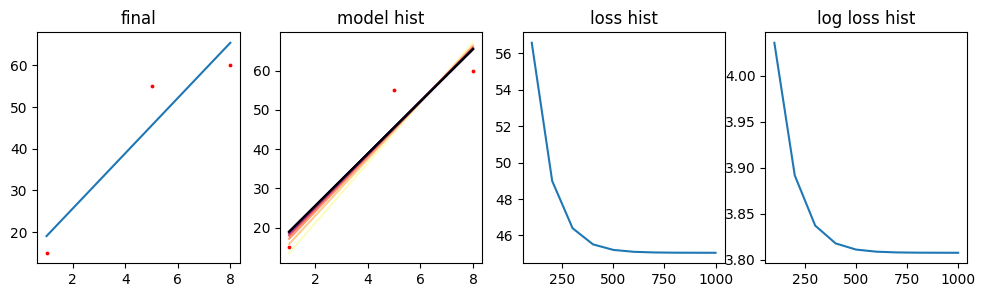

In [86]:
drawGraph(hours,scores,loss_hist,model_hist,num_epoch)

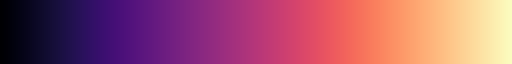

In [60]:
plt.colormaps()[0]
plt.cm.magma


class로 만드려는 시도

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class MyModel(torch.nn.Module):
    def __init__(self,input,label,num_epoch):
        super().__init__()
        
        self.x = input #[1.0, 5.0, 8.0] # 공부 시간
        self.y = label #[15.0, 55.0, 60.0] 
        self.num_epoch=num_epoch
        self.loss_hist=[]
        self.model_hist =[]

    def train(self,lr=0.01):
        
        a = torch.tensor([0.1],requires_grad=True)
        b = torch.tensor([0.1],requires_grad=True)

        x_data = torch.tensor(self.x)
        t = torch.tensor(self.y)

        for epoch in range(1,self.num_epoch+1):
            a.grad,b.grad=None,None

            y_pred = a*x_data+b
            loss = sum((t-y_pred)**2) /3
            loss.backward()
            with torch.no_grad():
                a-= lr*a.grad
                b-= lr*b.grad
            #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
            if epoch%(self.num_epoch//10)==0:
                print(f"Epoch {epoch}: loss = {loss.item():.2f}, a={a.item():.2f} b={b.item():.2f}")

            self.loss_hist.append(loss.item())
            self.model_hist.append([a.item(),b.item()])

    def drawGraph(self):
        fig,axs = plt.subplots(1,4,figsize=(12,3))
        x_lin = np.linspace(self.x[0],self.x[-1],10)

        axs[0].scatter(self.x,self.y,s=3,c='red')
        axs[0].plot(x_lin,self.model_hist[-1][0]*x_lin+self.model_hist[-1][1])

        cm = plt.cm.magma_r(np.linspace(0,1,10))
        axs[1].scatter(self.x,self.y,s=3,c='red')
        j=0
        for i in np.linspace(0,len(self.model_hist)-1,10,dtype=np.int32):
            axs[1].plot(x_lin,self.model_hist[i][0]*x_lin+self.model_hist[i][1]\
            ,c=cm[j])
            j+=1

        axs[2].plot(np.arange(len(self.loss_hist)),self.loss_hist)    
        axs[3].plot(np.arange(len(self.loss_hist)),[np.log(loss) for loss in self.loss_hist])    

        axs[0].set_title('final')
        axs[1].set_title('model hist')
        axs[2].set_title('loss hist')
        axs[3].set_title('log loss hist')
        plt.show()

Epoch 100: loss = 56.59, a=7.63 b=5.98
Epoch 200: loss = 48.99, a=7.21 b=8.66
Epoch 300: loss = 46.39, a=6.97 b=10.23
Epoch 400: loss = 45.51, a=6.82 b=11.14
Epoch 500: loss = 45.20, a=6.74 b=11.68
Epoch 600: loss = 45.10, a=6.69 b=11.99
Epoch 700: loss = 45.06, a=6.66 b=12.17
Epoch 800: loss = 45.05, a=6.65 b=12.28
Epoch 900: loss = 45.05, a=6.64 b=12.34
Epoch 1000: loss = 45.05, a=6.63 b=12.38


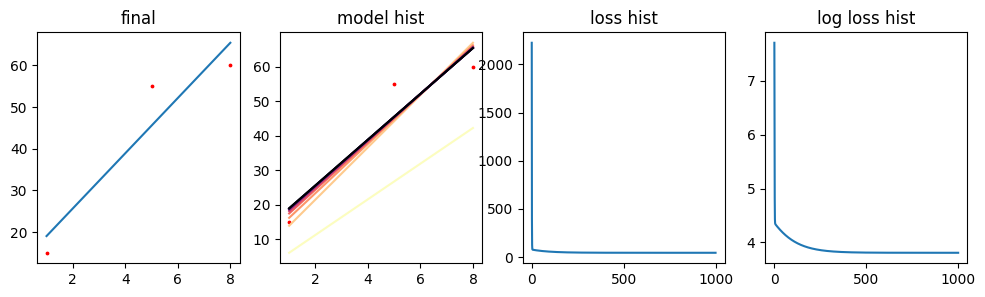

In [29]:
hours = [1.0, 5.0, 8.0] # 공부 시간
scores = [15.0, 55.0, 60.0]
num_epoch=1000
model = MyModel(hours,scores,1000)
model.train()
model.drawGraph()

tensor parameter를 class 안에 넣으려는 시도  
optim이랑 loss 패키지도 사용

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.nn import MSELoss
import copy

class MyModel2(torch.nn.Module):
    def __init__(self,input,label,num_epoch):
        super().__init__()
        ## tensor를 여기서 관리. input은 forward로 받으면 됨
        
        self.a = torch.tensor([0.1])
        self.b = torch.tensor([0.1])
        self.a=torch.nn.Parameter(self.a)
        self.b=torch.nn.Parameter(self.b)

        self.x = input #[1.0, 5.0, 8.0] # 공부 시간
        self.y = label #[15.0, 55.0, 60.0] 
        self.num_epoch=num_epoch
        self.loss_hist=[]
        self.model_hist =[]
    
    def forward(self,x):
        y = self.a*x+self.b
        return y

    def train(self,lr=0.01):

        optimizer = SGD([self.a,self.b],lr)
        loss_fn = MSELoss()

        x_data = torch.tensor(self.x)
        t = torch.tensor(self.y)

        for epoch in range(1,self.num_epoch+1):
            optimizer.zero_grad()
            loss = loss_fn(t-self.forward(x_data))
            loss.backward()
            optimizer.step()
            #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
            if epoch%(self.num_epoch//10)==0:
                print(f"Epoch {epoch}: loss = {loss.item():.2f}, a={self.a.item():.2f} b={self.b.item():.2f}")

            self.loss_hist.append(loss.item())
            self.model_hist.append([self.a.item(),self.b.item()])

    def drawGraph(self):
        fig,axs = plt.subplots(1,4,figsize=(12,3))
        x_lin = np.linspace(self.x[0],self.x[-1],10)

        axs[0].scatter(self.x,self.y,s=3,c='red')
        axs[0].plot(x_lin,self.model_hist[-1][0]*x_lin+self.model_hist[-1][1])

        cm = plt.cm.magma_r(np.linspace(0,1,10))
        axs[1].scatter(self.x,self.y,s=3,c='red')
        j=0
        for i in np.linspace(0,len(self.model_hist)-1,10,dtype=np.int32):
            axs[1].plot(x_lin,self.model_hist[i][0]*x_lin+self.model_hist[i][1]\
            ,c=cm[j])
            j+=1

        axs[2].plot(np.arange(len(self.loss_hist)),self.loss_hist)    
        axs[3].plot(np.arange(len(self.loss_hist)),[np.log(loss) for loss in self.loss_hist])    

        axs[0].set_title('final')
        axs[1].set_title('model hist')
        axs[2].set_title('loss hist')
        axs[3].set_title('log loss hist')
        plt.show()

In [5]:
hours = [1.0, 5.0, 8.0] # 공부 시간
scores = [15.0, 55.0, 60.0]
num_epoch=1000
model = MyModel2(hours,scores,1000)
model.train()
model.drawGraph()

TypeError: forward() missing 1 required positional argument: 'target'

diamond.csv 221205

In [5]:
import pandas as pd

df = pd.read_csv('diamonds.csv')

df.head(3)
df[['carat','price']].describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.nn import MSELoss
import copy

class MyModelClass(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## tensor를 여기서 관리. input은 forward로 받으면 됨
        
        self.a = torch.tensor([0.1])
        self.b = torch.tensor([0.1])
        #self.c = torch.tensor([0.1])
        self.a=torch.nn.Parameter(self.a)
        self.b=torch.nn.Parameter(self.b)
        #self.c=torch.nn.Parameter(self.c)
    def forward(self,x):
        #y = self.c*x**2+self.a*x+self.b
        y = self.a*x+self.b
        return y        

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch

model = MyModelClass()
optimizer = SGD(model.parameters(),lr=0.01)
loss_fn = MSELoss()

x_data = torch.tensor(df['carat'],dtype=torch.float32)
t = torch.tensor(df['price'],dtype=torch.float32)

lr=0.01
num_epoch = 1000
loss_hist=[]
model_hist =[]

def train():
    global x_data,t,optimizer, loss_fn,loss_hist,model_hist,num_epoch

    for epoch in range(1,num_epoch+1):
        optimizer.zero_grad()
        loss = loss_fn(t,model(x_data))
        loss.backward()
        optimizer.step()
        #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
        if epoch%(num_epoch//10)==0:
            print(f"Epoch {epoch}: loss = {loss.item():.2f}, a={model.a.item():.2f} b={model.b.item():.2f}")
        loss_hist.append(loss.item())
        model_hist.append(copy.deepcopy(model))
    
    return loss_hist,model_hist
    
def drawGraph():
    global x_data,t,loss_hist,model_hist

    fig,axs = plt.subplots(1,4,figsize=(12,3))
    x_lin = np.linspace(x_data.min(),x_data.max(),10)

    axs[0].scatter(x_data,t,s=3,c='red')
    axs[0].plot(x_lin,model_hist[-1].c.item()*x_lin**2+model_hist[-1].a.item()*x_lin+model_hist[-1].b.item())

    cm = plt.cm.magma_r(np.linspace(0,1,10))
    axs[1].scatter(x_data,t,s=3,c='red')
    for i in np.linspace(0,len(model_hist)-1,10,dtype=np.int32):
        axs[1].plot(x_lin,model_hist[i].c.item()*x_lin**2+model_hist[i].a.item()*x_lin+model_hist[i].b.item(),c=cm[i//(len(model_hist)//10)])

    axs[2].plot(np.arange(len(loss_hist)),loss_hist)    
    axs[3].plot(np.arange(len(loss_hist)),[np.log(loss) for loss in loss_hist])    

    axs[0].set_title('final')
    axs[1].set_title('model hist')
    axs[2].set_title('loss hist')
    axs[3].set_title('log loss hist')
    plt.show()

In [ ]:
train()


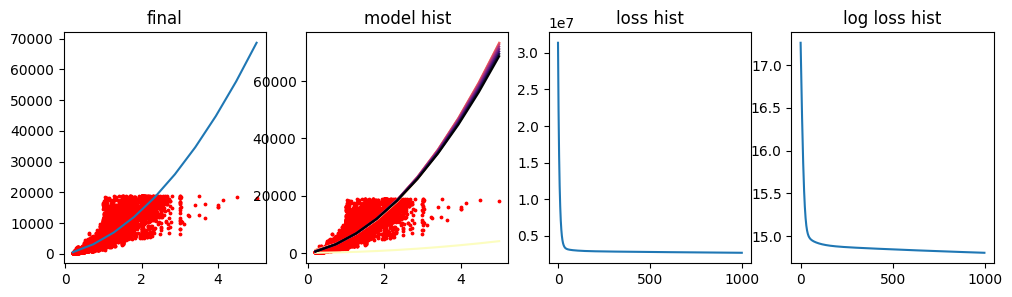

In [24]:
drawGraph()

### 04 stochastic gradient descent

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.nn import MSELoss
import copy

class MyModelClass(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## tensor를 여기서 관리. input은 forward로 받으면 됨
        
        self.a = torch.tensor([0.1])
        self.b = torch.tensor([0.1])
        #self.c = torch.tensor([0.1])
        self.a=torch.nn.Parameter(self.a)
        self.b=torch.nn.Parameter(self.b)
        #self.c=torch.nn.Parameter(self.c)
    def forward(self,x):
        #y = self.c*x**2+self.a*x+self.b
        y = self.a*x+self.b
        return y        

In [7]:
from torch.utils.data import Dataset,DataLoader
import pandas as pd
class MyDataset(Dataset):
    def __init__(self):
        super().__init__()
        self.df = pd.read_csv('diamonds.csv')
        self.x = self.df['carat'].to_numpy(dtype=np.float32)
        self.y = self.df['price'].to_numpy(dtype=np.float32)
    
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx): 
        return [self.x[idx],self.y[idx]]

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch

model = MyModelClass()
optimizer = SGD(model.parameters(),lr=0.01)
loss_fn = MSELoss()

dataset = MyDataset()
dataloader=DataLoader(dataset,32,shuffle=True)

lr=0.01
num_epoch = 100
loss_hist=[]
model_hist =[]

def train():
    global dataset,optimizer, loss_fn,loss_hist,model_hist,num_epoch

    for epoch in range(1,num_epoch+1):
        mini_loss = 0
        for i,(x_data,t) in enumerate(dataloader):
            optimizer.zero_grad()
            loss = loss_fn(t,model(x_data))
            loss.backward()
            optimizer.step()
            mini_loss+=loss.item()
        
        final_loss = mini_loss/len(dataloader)
        loss_hist.append(final_loss)
        model_hist.append(copy.deepcopy(model))
        #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
        if epoch%(num_epoch//10)==0:
            print(f"Epoch {epoch}: loss = {final_loss:.2f}, a={model.a.item():.2f} b={model.b.item():.2f}")
    
    return loss_hist,model_hist
    
def drawGraph():
    global dataset,loss_hist,model_hist

    fig,axs = plt.subplots(1,4,figsize=(12,3))
    x_lin = np.linspace(dataset.x.min(),dataset.x.max(),10)
    axs[0].scatter(dataset.x,dataset.y,s=3,c='red')
    axs[0].plot(x_lin,model_hist[-1].a.item()*x_lin+model_hist[-1].b.item())

    cm = plt.cm.magma_r(np.linspace(0,1,10))
    axs[1].scatter(dataset.x,dataset.y,s=3,c='red')
    for i in np.linspace(0,len(model_hist)-1,10,dtype=np.int32):
        axs[1].plot(x_lin,model_hist[i].a.item()*x_lin+model_hist[i].b.item(),c=cm[i//(len(model_hist)//10)])

    axs[2].plot(np.arange(len(loss_hist)),loss_hist)    
    axs[3].plot(np.arange(len(loss_hist)),[np.log(loss) for loss in loss_hist])    

    axs[0].set_title('final')
    axs[1].set_title('model hist')
    axs[2].set_title('loss hist')
    axs[3].set_title('log loss hist')
    plt.show()

In [9]:
train()

Epoch 10: loss = 2400507.80, a=7780.91 b=-2221.81
Epoch 20: loss = 2400987.00, a=7808.63 b=-2271.36
Epoch 30: loss = 2399774.88, a=7812.16 b=-2295.00
Epoch 40: loss = 2399835.33, a=7776.21 b=-2200.84
Epoch 50: loss = 2401402.65, a=7747.04 b=-2285.98
Epoch 60: loss = 2400864.96, a=7759.67 b=-2277.38
Epoch 70: loss = 2399551.46, a=7662.52 b=-2245.47
Epoch 80: loss = 2401453.22, a=7778.34 b=-2237.87
Epoch 90: loss = 2400354.55, a=7781.18 b=-2271.39
Epoch 100: loss = 2400840.93, a=7765.58 b=-2234.85


([3367939.9164998517,
  2401228.7058125744,
  2400637.2706109136,
  2400680.215246886,
  2400653.840914146,
  2401735.880875593,
  2401145.8631746736,
  2400950.0144387605,
  2401003.87485172,
  2400507.800100089,
  2400267.9338300712,
  2402521.8497924083,
  2401401.932050712,
  2401057.253076809,
  2400337.9355352907,
  2400816.5879485467,
  2400257.1111358246,
  2400323.7266829773,
  2400912.647482948,
  2400987.000611655,
  2401012.4902320583,
  2400937.493531287,
  2401094.2123368923,
  2400288.73407844,
  2400817.1725051897,
  2401085.8013604684,
  2400320.8047338375,
  2399800.4855056345,
  2400948.9646537662,
  2399774.8839338673,
  2402509.4648205815,
  2400481.200381821,
  2400687.73348532,
  2400827.6075956407,
  2400490.324492141,
  2402222.181587337,
  2400260.951308571,
  2399580.293686981,
  2401157.5173116843,
  2399835.325641311,
  2400727.0394424675,
  2400361.1259638197,
  2400833.008618772,
  2400581.787885528,
  2400148.1357502965,
  2400805.577661625,
  2400995.12

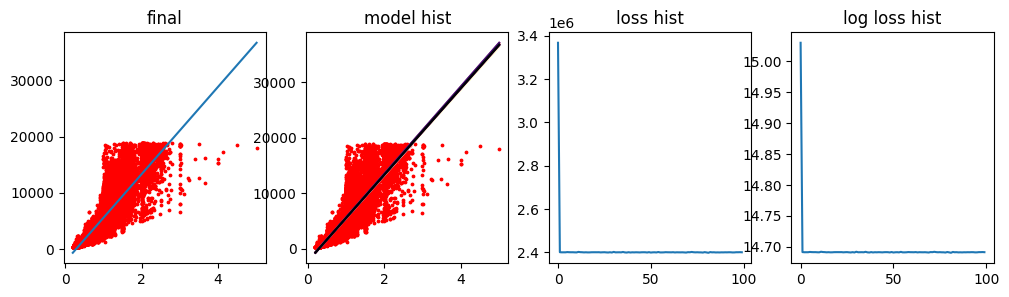

In [10]:
drawGraph()